Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional for nicer plotting styles
sns.set_theme(style="whitegrid")


In [31]:
train_data = pd.read_csv('/Users/yunusajib/Desktop/customer-churn-prediction/Data/Raw/Telco_Churn/train.csv')
val_data = pd.read_csv('/Users/yunusajib/Desktop/customer-churn-prediction/Data/Raw/Telco_Churn/validation.csv')
# Adjust the path if necessary (e.g., if your notebook is in a different directory level)

train_data.head(3)

,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Churn Category,Churn Reason,Churn Score,City,CLTV,Contract,Country,...,Tenure in Months,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,Total Revenue,Under 30,Unlimited Data,Zip Code,Churn
0,72,4,19.44,NaN,NaN,51,San Mateo,4849,Two Year,United States,...,25,2191.15,0,486.00,0.0,2677.15,0,1,94403,0
1,27,59,45.62,NaN,NaN,27,Sutter Creek,3715,Month-to-Month,United States,...,35,3418.20,0,1596.70,0.0,5014.90,1,1,95685,0
2,59,0,16.07,NaN,NaN,59,Santa Cruz,5092,Month-to-Month,United States,...,46,851.20,0,739.22,0.0,1590.42,0,0,95064,0


In [34]:
# check null values in train set
train_data.isnull().sum()


Age                                     0
Avg Monthly GB Download                 0
Avg Monthly Long Distance Charges       0
Churn Category                       3104
Churn Reason                         3104
Churn Score                             0
City                                    0
CLTV                                    0
Contract                                0
Country                                 0
Customer ID                             0
Customer Status                         0
Dependents                              0
Device Protection Plan                  0
Gender                                  0
Internet Service                        0
Internet Type                         886
Lat Long                                0
Latitude                                0
Longitude                               0
Married                                 0
Monthly Charge                          0
Multiple Lines                          0
Number of Dependents              

In [35]:
# check null value in validation
val_data.isnull().sum()

Age                                     0
Avg Monthly GB Download                 0
Avg Monthly Long Distance Charges       0
Churn Category                       1035
Churn Reason                         1035
Churn Score                             0
City                                    0
CLTV                                    0
Contract                                0
Country                                 0
Customer ID                             0
Customer Status                         0
Dependents                              0
Device Protection Plan                  0
Gender                                  0
Internet Service                        0
Internet Type                         332
Lat Long                                0
Latitude                                0
Longitude                               0
Married                                 0
Monthly Charge                          0
Multiple Lines                          0
Number of Dependents              

In [57]:
# Check Data Types 
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4225 entries, 0 to 4224
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4225 non-null   int64  
 1   Avg Monthly GB Download            4225 non-null   int64  
 2   Avg Monthly Long Distance Charges  4225 non-null   float64
 3   Churn Category                     1121 non-null   object 
 4   Churn Reason                       1121 non-null   object 
 5   Churn Score                        4225 non-null   int64  
 6   City                               4225 non-null   object 
 7   CLTV                               4225 non-null   int64  
 8   Contract                           4225 non-null   object 
 9   Country                            4225 non-null   object 
 10  Customer ID                        4225 non-null   object 
 11  Customer Status                    4225 non-null   objec

Target variable distribution
<!-- to check if there is imbalance between the classes -->

In [39]:
print(train_data['Churn'].value_counts())
print(train_data['Churn'].value_counts(normalize=True))


Churn
0    3104
1    1121
Name: count, dtype: int64
Churn
0    0.734675
1    0.265325
Name: proportion, dtype: float64


In [64]:
# map the classes to Yes or No
train_data['Churn'] = train_data['Churn'].map({'Yes': 1, 'No': 0})
val_data['Churn'] = val_data['Churn'].map({'Yes': 1, 'No': 0})
# val_data['Churn']

Shows how a single numeric feature is distributed

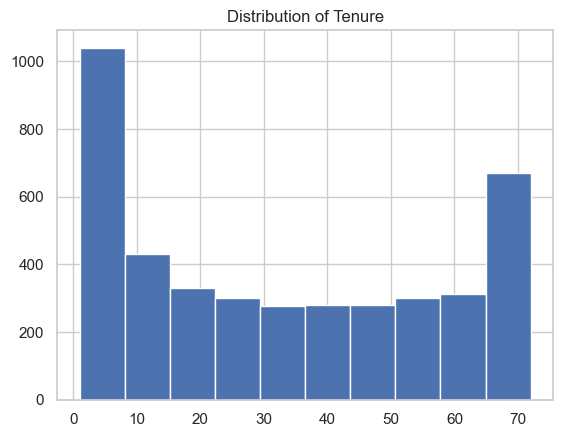

In [42]:
train_data['Tenure in Months'].hist()
plt.title('Distribution of Tenure')
plt.show()


Visualizes how many observations fall into each category

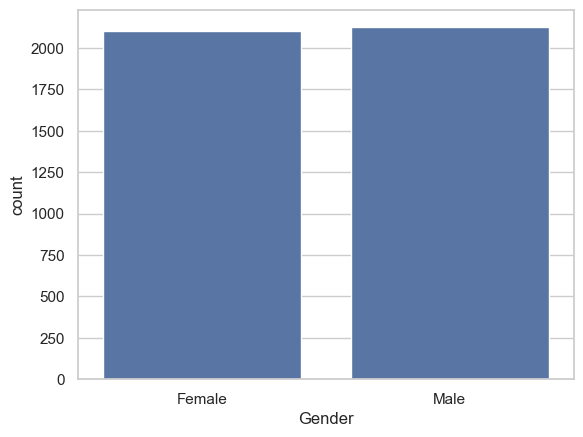

In [50]:
sns.countplot(x='Gender', data=train_data)
plt.show()
# train_data.columns

Show corelation coefficient between .

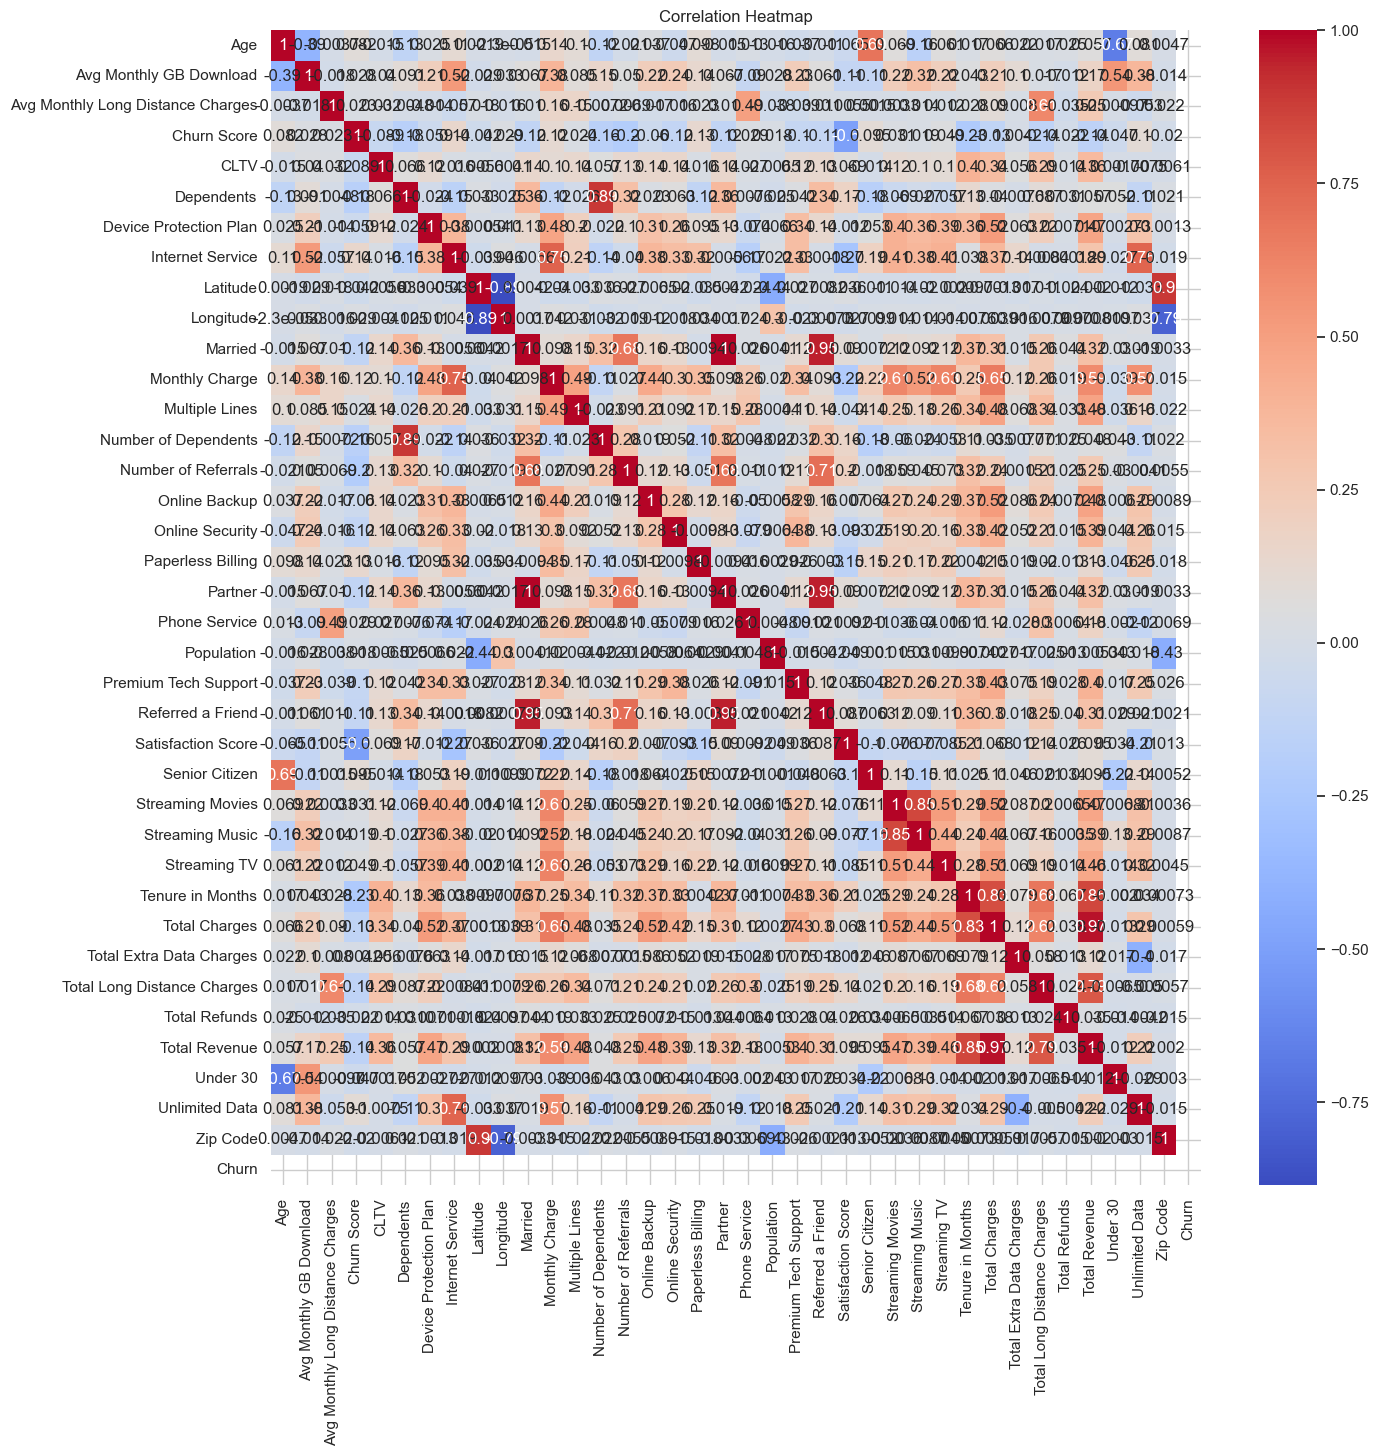

In [65]:
numeric_df = train_data.select_dtypes(include=['float', 'int', 'uint'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(15,15))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
